In [1]:
#import google drive
from google.colab import drive
#mount google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/YOLOv4_tiny_2

/content/gdrive/My Drive/YOLOv4_tiny_2


In [7]:
# download darknet folder - for windows use darknet of AlexeyAB and for linux download darknet of pjreddie
# uncomment the below line to download darknet folder. I already have so commented it

!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


Changes to do in yolov4 architecture as per your dataset Open darknet folder -> cfg folder -> yolov4-tiny.cfg (Delete everything else)

change batch=1 from batch=64

change subdivisions=1 from subdivisions=16

width=608 #416 height=608 #416

Next is max_batches.This parameter is very very important.The thing to remember here is that minimum batch value would be 6000 ( if you have 1 class or 2 classes or 3 classes.)

#### In our case we have 4 classes. So max_batches would be 4*2000 = 8000 i.e 8000 would be the max_batches.

#### Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch
#### steps are steps=7200,6400  (90% of 8000 and 80% of 8000)


Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch steps are steps=5400,4800 (90% of 6000 and 80% of 6000)

We have 3 YOLO layers for 3 different scales.

Showing you a demo below. Just see the [Yolo] layer. Above [YOLO] layer, we have [convolutional] layer. Change the number of filters as per your output classes as per this calculation (classes+5)3 = (2+5)3 = 21

In [12]:
# Upload your dataset folder inside a data folder of darknet.

# Now let's dicide our dataset in train and tes using below script


import glob
import os
import numpy as np
import sys

current_dir = "/mydrive//YOLOv4_tiny_2//darknet//data//pedestrian_car_sign_(60)/" #sometimes it doesn't work because this folder name is not the same as the one in data folder! make sure they are connsistent after re-new the dataset folder
#split_pct = 10;
split_pct = 1; #use this to change the ratio of number of train images/number of test images #ex: split_pct = 1 means every 100 pictures have 1 picture for testing
file_train = open("darknet/data/train.txt", "w")  
file_val = open("darknet/data/test.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        if counter == index_test:
                counter = 1
                file_val.write(current_dir + "/" + title + '.jpg' + "\n")
        else:
                file_train.write(current_dir + "/" + title + '.jpg' + "\n")
                counter = counter + 1
file_train.close()
file_val.close()

In [ ]:
#import glob
#import os
#import numpy as np
#import sys

#images_list = glob.glob("data/obj/yolo_training_images/*.jpg")
#print(images_list)

In [ ]:
#Create training.txt file
#file = open("data/train.txt", "w") 
#file.write("\n".join(images_list)) 
#file.close()

In [ ]:
# Inside your data folder, you will see train.txt and test.txt file now.
# Now create 2 files in data folder - obj.data and obj.names

IMG_0408 Medium.txt: 
5 0.882292 0.112500 0.093750 0.103125

IMG_0409 Medium.txt: 
5 0.817708 0.130469 0.077083 0.082812

IMG_0407 Medium.txt: 
5 0.809375 0.135156 0.093750 0.098437

IMG_0413 Medium.txt: 
5 0.723958 0.155469 0.110417 0.098437



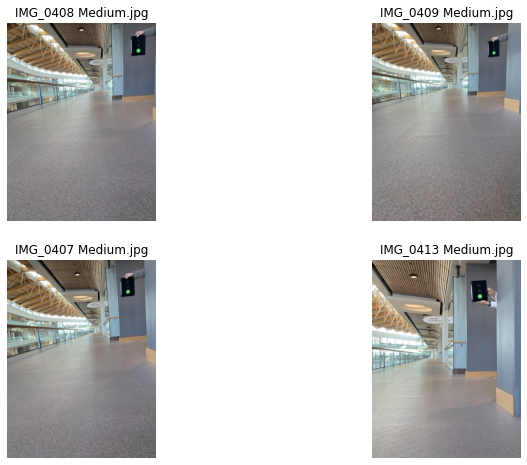

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/pedestrian_car_sign_(60)/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [14]:
pwd

'/content/gdrive/MyDrive/YOLOv4_tiny_2'

In [15]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights
# Run the following command to download the YOLOv4 pre-trained weights file.
%cd darknet/data/

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

/content/gdrive/MyDrive/YOLOv4_tiny_2/darknet/data


In [16]:
%cd ..

/content/gdrive/MyDrive/YOLOv4_tiny_2/darknet


In [17]:
#%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
# if here shows error, make sure to comment the clone github darknet line on the top



In [18]:
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [19]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show  #changed number of iterations for weights file in detector.c file in src folder
#!./darknet detector train /mydrive//YOLOv4_tiny_2//darknet//data//obj.data cfg//yolov4-tiny-custom.cfg yolov4-tiny.conv.29  -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 1434609, rewritten_bbox = 0.161507 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.823564), count: 1, class_loss = 0.000007, iou_loss = 0.042028, total_loss = 0.042035 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 1434610, rewritten_bbox = 0.161507 % 

 Tensor Cores are used.
]2;11641/28000: loss=0.0 hours left=5.1
 11641: 0.042359, 0.047736 avg loss, 0.002610 rate, 1.077018 seconds, 745024 images, 5.063494 hours left
Loaded: 0.000043 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.917625), count: 1, class_loss = 0.000391, iou_loss = 0.087888, total_loss = 0.088279 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000,

In [20]:
# continue to training from last.weight
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny-custom_last.weights -dont_show -clear ##continue training from stop(interupt/purse) 
##1. The last weights file needs to be updated everytime before resuming training with the newest last weights. 
##2. And put it in darknet folder(make a copy of the one in backup folder and move the copy, don't move the original one) or any folder inside darknet folder that the system has access to.
##3. The count of iteration will continue from where it stoped and the previous loss on the avg-loss-chart.png will be cleared and the new avg-loss start from the current number of iteration. 
##4. The weights will also continue from where it stoped and start from the current number of iteration. 
##5. Remove the weights used for resuming training (the copy made by step 2)
##6. When dataset changed and more images added in, the iteration will reach the max_batches set in the cfg file based on the number of classes. If this happens, use "-clear" flag to reset iterations in weights file (do not change max_batches if # of classes is not changed). 
##   And remember to back up all the previous weights before reset iterations.
##ps. The last weights is keep updating and can manage its version in google drive.
#!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg backup2/yolov4-tiny-custom_last.weights  ##https://github.com/pjreddie/darknet/issues/1458

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.852198), count: 1, class_loss = 0.000166, iou_loss = 3.214213, total_loss = 3.214379 
 total_bbox = 1163182, rewritten_bbox = 0.121047 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.799500), count: 1, class_loss = 0.042888, iou_loss = 0.039617, total_loss = 0.082505 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1163183, rewritten_bbox = 0.121047 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.902387), count: 2, class_loss = 0.000001, iou_loss = 1.751234, total_loss = 1.751235 
v3 (i

In [ ]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [ ]:
img_path = "/mydrive//YOLOv4_tiny_2//darknet//data/test.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom-test.cfg data/yolov4-tiny-custom_last.weights {img_path} -dont_show

In [ ]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)